In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from IPython.display import Image

import glob
import re
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import statistics
import collections
import itertools
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import gc
import time
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.stats import iqr
from scipy.stats import pearsonr
from scipy.stats import skew
from scipy.stats import kurtosis
from spectrum import *
from statsmodels.robust import mad as median_deviation
from sklearn.preprocessing import minmax_scale
import os

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from lightgbm import LGBMClassifier

In [2]:
all_feature145_names = ['t-Mean-1',
 't-Mean-2',
 't-Mean-3',
 't-STD-1',
 't-STD-2',
 't-STD-3',
 't-Mad-1',
 't-Mad-2',
 't-Mad-3',
 't-Max-1',
 't-Max-2',
 't-Max-3',
 't-Min-1',
 't-Min-2',
 't-Min-3',
 't-SMA-1',
 't-Energy-1',
 't-Energy-2',
 't-Energy-3',
 't-IQR-1',
 't-IQR-2',
 't-IQR-3',
 't-ropy-1',
 't-ropy-2',
 't-ropy-3',
 't-ARCoeff-1',
 't-ARCoeff-2',
 't-ARCoeff-3',
 't-ARCoeff-4',
 't-ARCoeff-5',
 't-ARCoeff-6',
 't-ARCoeff-7',
 't-ARCoeff-8',
 't-ARCoeff-9',
 't-ARCoeff-10',
 't-ARCoeff-11',
 't-ARCoeff-12',
 't-Correlation-1',
 't-Correlation-2',
 't-Correlation-3',
 't-Mean-mag',
 't-STD-mag',
 't-Mad-mag',
 't-Max-mag',
 't-Min-mag',
 't-SMA-mag',
 't-Energy-mag',
 't-IQR-mag',
 't-ropy-mag',
 't-ARCoeff-mag1',
 't-ARCoeff-mag2',
 't-ARCoeff-mag3',
 't-ARCoeff-mag4',
 'f-Mean-1',
 'f-Mean-2',
 'f-Mean-3',
 'f-STD-1',
 'f-STD-2',
 'f-STD-3',
 'f-Mad-1',
 'f-Mad-2',
 'f-Mad-3',
 'f-Max-1',
 'f-Max-2',
 'f-Max-3',
 'f-Min-1',
 'f-Min-2',
 'f-Min-3',
 'f-SMA-1',
 'f-Energy-1',
 'f-Energy-2',
 'f-Energy-3',
 'f-IQR-1',
 'f-IQR-2',
 'f-IQR-3',
 'f-ropy-1',
 'f-ropy-2',
 'f-ropy-3',
 'f-MaxInds-1',
 'f-MaxInds-2',
 'f-MaxInds-3',
 'f-MeanFreq-1',
 'f-MeanFreq-2',
 'f-MeanFreq-3',
 'f-Skewness-1',
 'f-Skewness-2',
 'f-Skewness-3',
 'f-Kurtosis-1',
 'f-Kurtosis-2',
 'f-Kurtosis-3',
 'f-BandsEnergyOld-1',
 'f-BandsEnergyOld-2',
 'f-BandsEnergyOld-3',
 'f-BandsEnergyOld-4',
 'f-BandsEnergyOld-5',
 'f-BandsEnergyOld-6',
 'f-BandsEnergyOld-7',
 'f-BandsEnergyOld-8',
 'f-BandsEnergyOld-9',
 'f-BandsEnergyOld-10',
 'f-BandsEnergyOld-11',
 'f-BandsEnergyOld-12',
 'f-BandsEnergyOld-13',
 'f-BandsEnergyOld-14',
 'f-BandsEnergyOld-15',
 'f-BandsEnergyOld-16',
 'f-BandsEnergyOld-17',
 'f-BandsEnergyOld-18',
 'f-BandsEnergyOld-19',
 'f-BandsEnergyOld-20',
 'f-BandsEnergyOld-21',
 'f-BandsEnergyOld-22',
 'f-BandsEnergyOld-23',
 'f-BandsEnergyOld-24',
 'f-BandsEnergyOld-25',
 'f-BandsEnergyOld-26',
 'f-BandsEnergyOld-27',
 'f-BandsEnergyOld-28',
 'f-BandsEnergyOld-29',
 'f-BandsEnergyOld-30',
 'f-BandsEnergyOld-31',
 'f-BandsEnergyOld-32',
 'f-BandsEnergyOld-33',
 'f-BandsEnergyOld-34',
 'f-BandsEnergyOld-35',
 'f-BandsEnergyOld-36',
 'f-BandsEnergyOld-37',
 'f-BandsEnergyOld-38',
 'f-BandsEnergyOld-39',
 'f-BandsEnergyOld-40',
 'f-BandsEnergyOld-41',
 'f-BandsEnergyOld-42',
 'f-Mean-mag',
 'f-STD-mag',
 'f-Mad-mag',
 'f-Max-mag',
 'f-Min-mag',
 'f-SMA-mag',
 'f-Energy-mag',
 'f-IQR-mag',
 'f-ropy-mag',
 'f-MaxInds-mag',
 'f-MeanFreq-mag',
 'f-Skewness-mag',
 'f-Kurtosis-mag']

def add_acc(n):
    return "acc_" + n


acc_feature145_names = list(map(add_acc, all_feature145_names))

In [3]:
os.getcwd()

'/Users/y-nakamura/yugo_workspace/bar_exercise/notebook'

In [4]:
os.getcwd()

terger_dir ="/Users/y-nakamura/yugo_workspace/bar_exercise/data/features/20210716"

os.chdir(terger_dir)

df_bottom = pd.read_csv(terger_dir + "/Bottom_2021-07-16T15.18.45.753_E2EE3F7D14CE_Accelerometer_features.csv")
df_middle = pd.read_csv(terger_dir + "/Middle_2021-07-16T15.18.10.660_CEF5C0D2C881_Accelerometer_features.csv")
df_upper = pd.read_csv(terger_dir + "/Upper_2021-07-16T15.17.48.292_D738727472C3_Accelerometer_features.csv")

df_bottom.head()

,acc_t-Mean-1,acc_t-Mean-2,acc_t-Mean-3,acc_t-STD-1,acc_t-STD-2,acc_t-STD-3,acc_t-Mad-1,acc_t-Mad-2,acc_t-Mad-3,acc_t-Max-1,...,acc_f-Min-mag,acc_f-SMA-mag,acc_f-Energy-mag,acc_f-IQR-mag,acc_f-ropy-mag,acc_f-MaxInds-mag,acc_f-MeanFreq-mag,acc_f-Skewness-mag,acc_f-Kurtosis-mag,label
0,0.030646,-0.989462,0.060354,0.000539,0.001229,0.000732,0.000000,0.000000,0.000000,0.032,...,0.000017,0.062243,0.122952,0.000274,-1.864755,0.0,0.075678,5.388157,27.032244,0
1,0.030523,-0.989323,0.060462,0.000558,0.000635,0.000658,0.000000,0.001483,0.000000,0.031,...,0.000016,0.062100,0.122919,0.000140,-1.910109,0.0,0.031693,5.388158,27.032253,0
2,0.030415,-0.989615,0.060492,0.000605,0.000672,0.000726,0.000000,0.001483,0.001483,0.032,...,0.000012,0.062127,0.122991,0.000140,-1.908171,0.0,0.036791,5.388158,27.032253,0
3,0.030554,-0.989815,0.060662,0.000556,0.000654,0.000663,0.001483,0.000000,0.000000,0.032,...,0.000017,0.062144,0.123044,0.000156,-1.907572,0.0,0.040245,5.388159,27.032255,0
4,0.030738,-0.989677,0.060538,0.000534,0.000529,0.000703,0.000000,0.000000,0.001483,0.032,...,0.000008,0.062100,0.123009,0.000091,-1.920214,0.0,0.029285,5.388159,27.032254,0


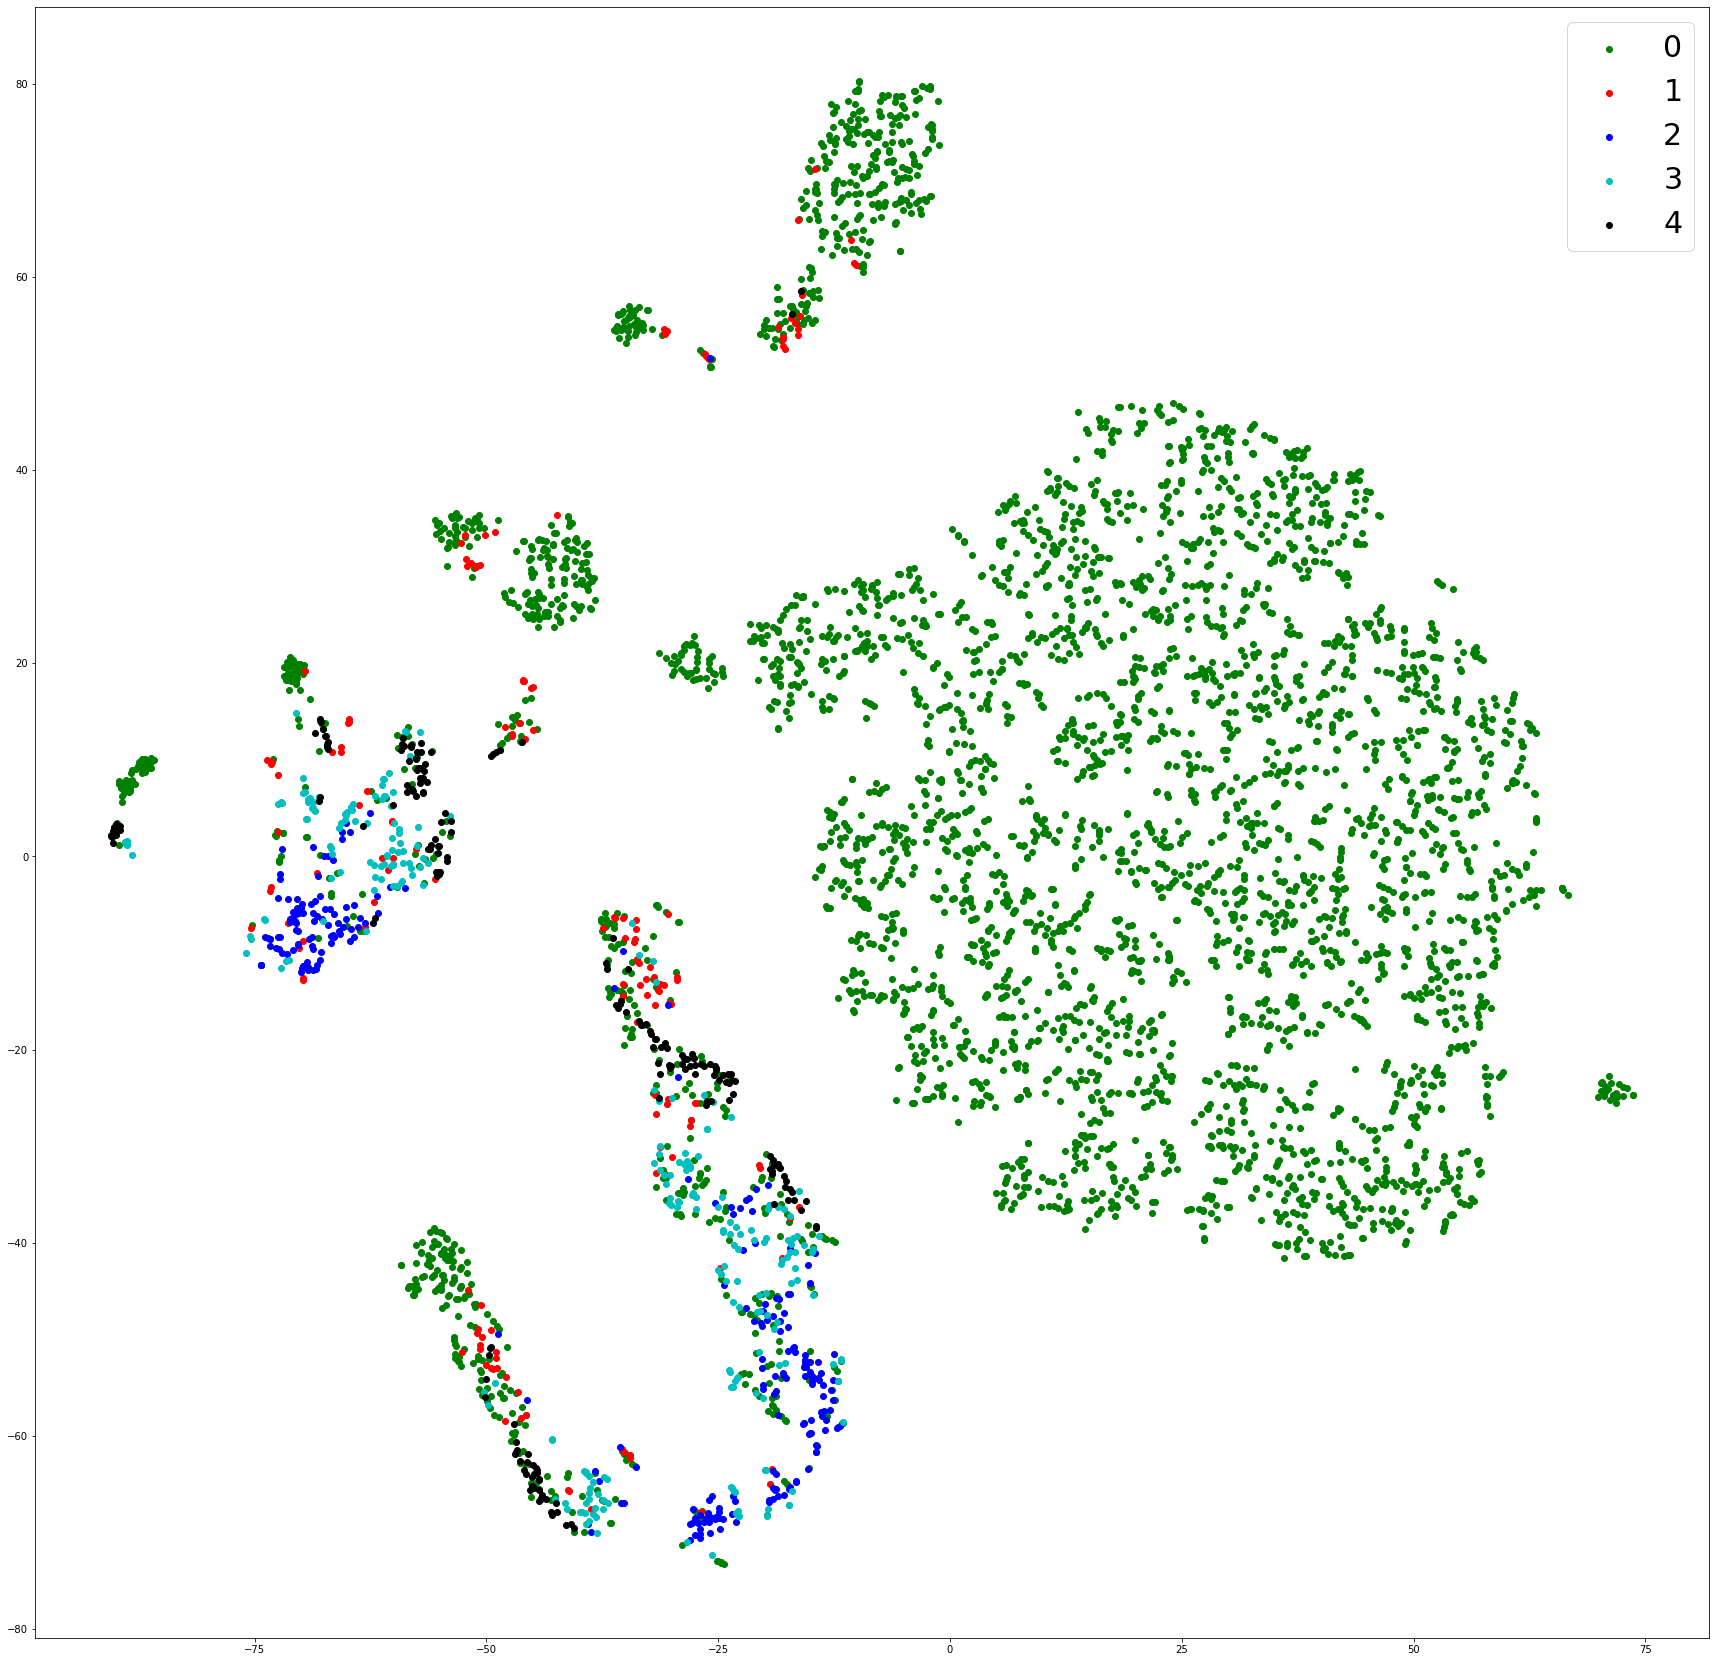

In [6]:
#filename = "/Users/y-nakamura/yugo_workspace/hand_scaling/data/clf_results/results_20210708/t-sne/force_acc_gyro.png"
df_feature= df_bottom 

sX = df_feature[df_feature.columns.values[:-1]].values
sY1 = df_feature.label.values

stsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
sX_embedded = stsne.fit_transform(sX)

df_tsne = pd.DataFrame(sX_embedded, columns = ['col1', 'col2'])

sddf = pd.concat([df_tsne, df_feature.label], axis = 1)

colors =  ["g", "r", "b", "c", "k"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(np.unique(sddf.label.values)):
    tmp_df = sddf[sddf.label== v]
    plt.scatter(tmp_df['col1'],  
                tmp_df ['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 30)

#plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)


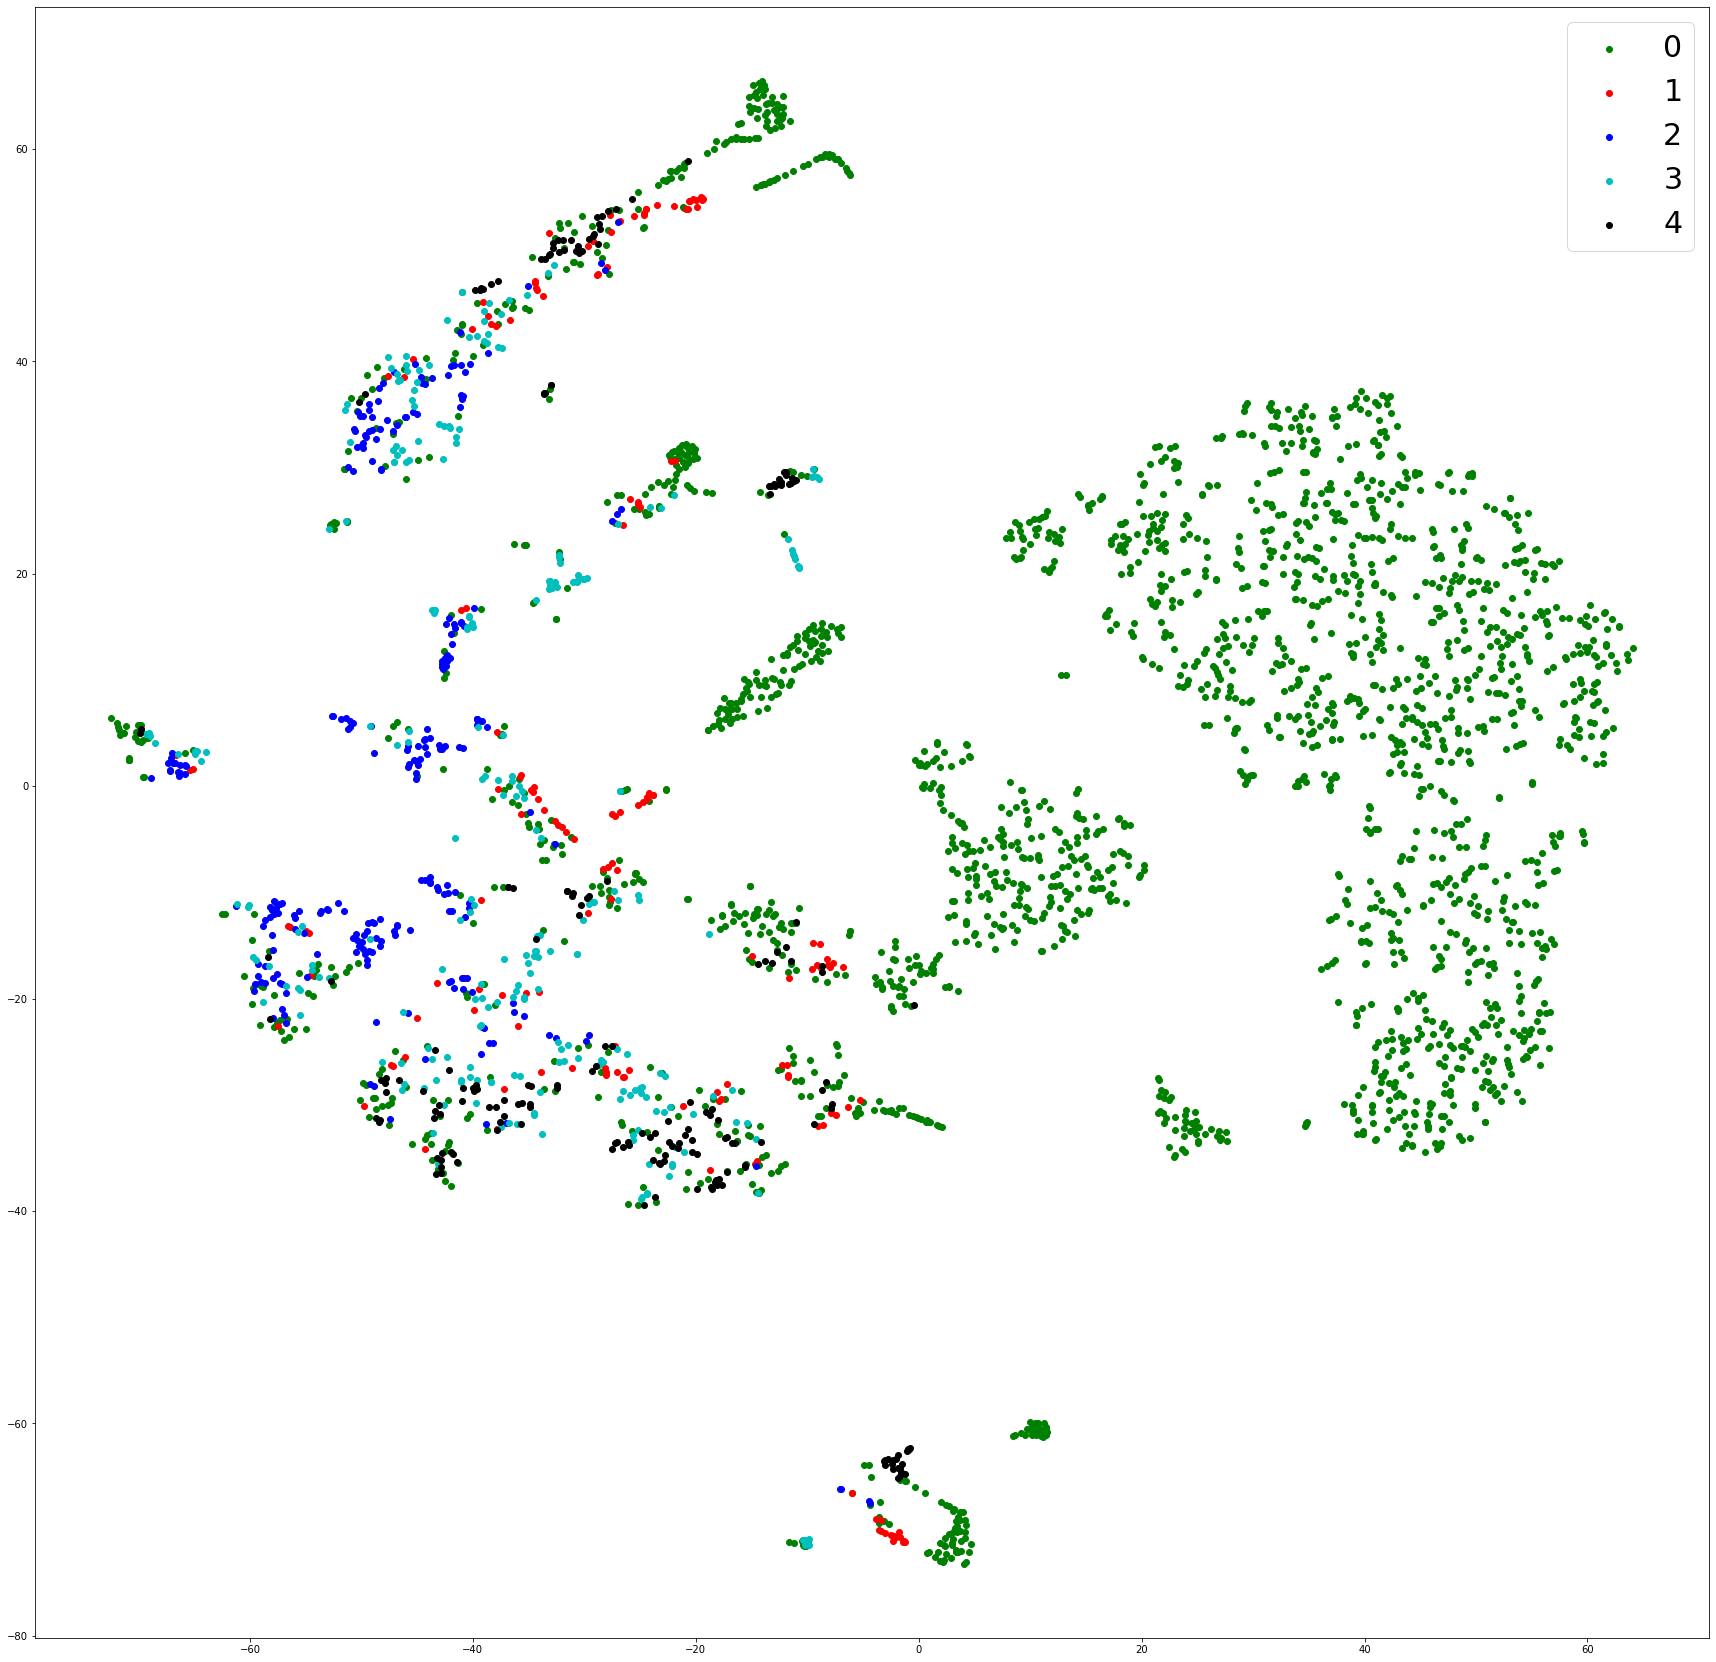

In [7]:
#filename = "/Users/y-nakamura/yugo_workspace/hand_scaling/data/clf_results/results_20210708/t-sne/force_acc_gyro.png"
df_feature= df_middle

sX = df_feature[df_feature.columns.values[:-1]].values
sY1 = df_feature.label.values

stsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
sX_embedded = stsne.fit_transform(sX)

df_tsne = pd.DataFrame(sX_embedded, columns = ['col1', 'col2'])

sddf = pd.concat([df_tsne, df_feature.label], axis = 1)

colors =  ["g", "r", "b", "c", "k"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(np.unique(sddf.label.values)):
    tmp_df = sddf[sddf.label== v]
    plt.scatter(tmp_df['col1'],  
                tmp_df ['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 30)

#plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)


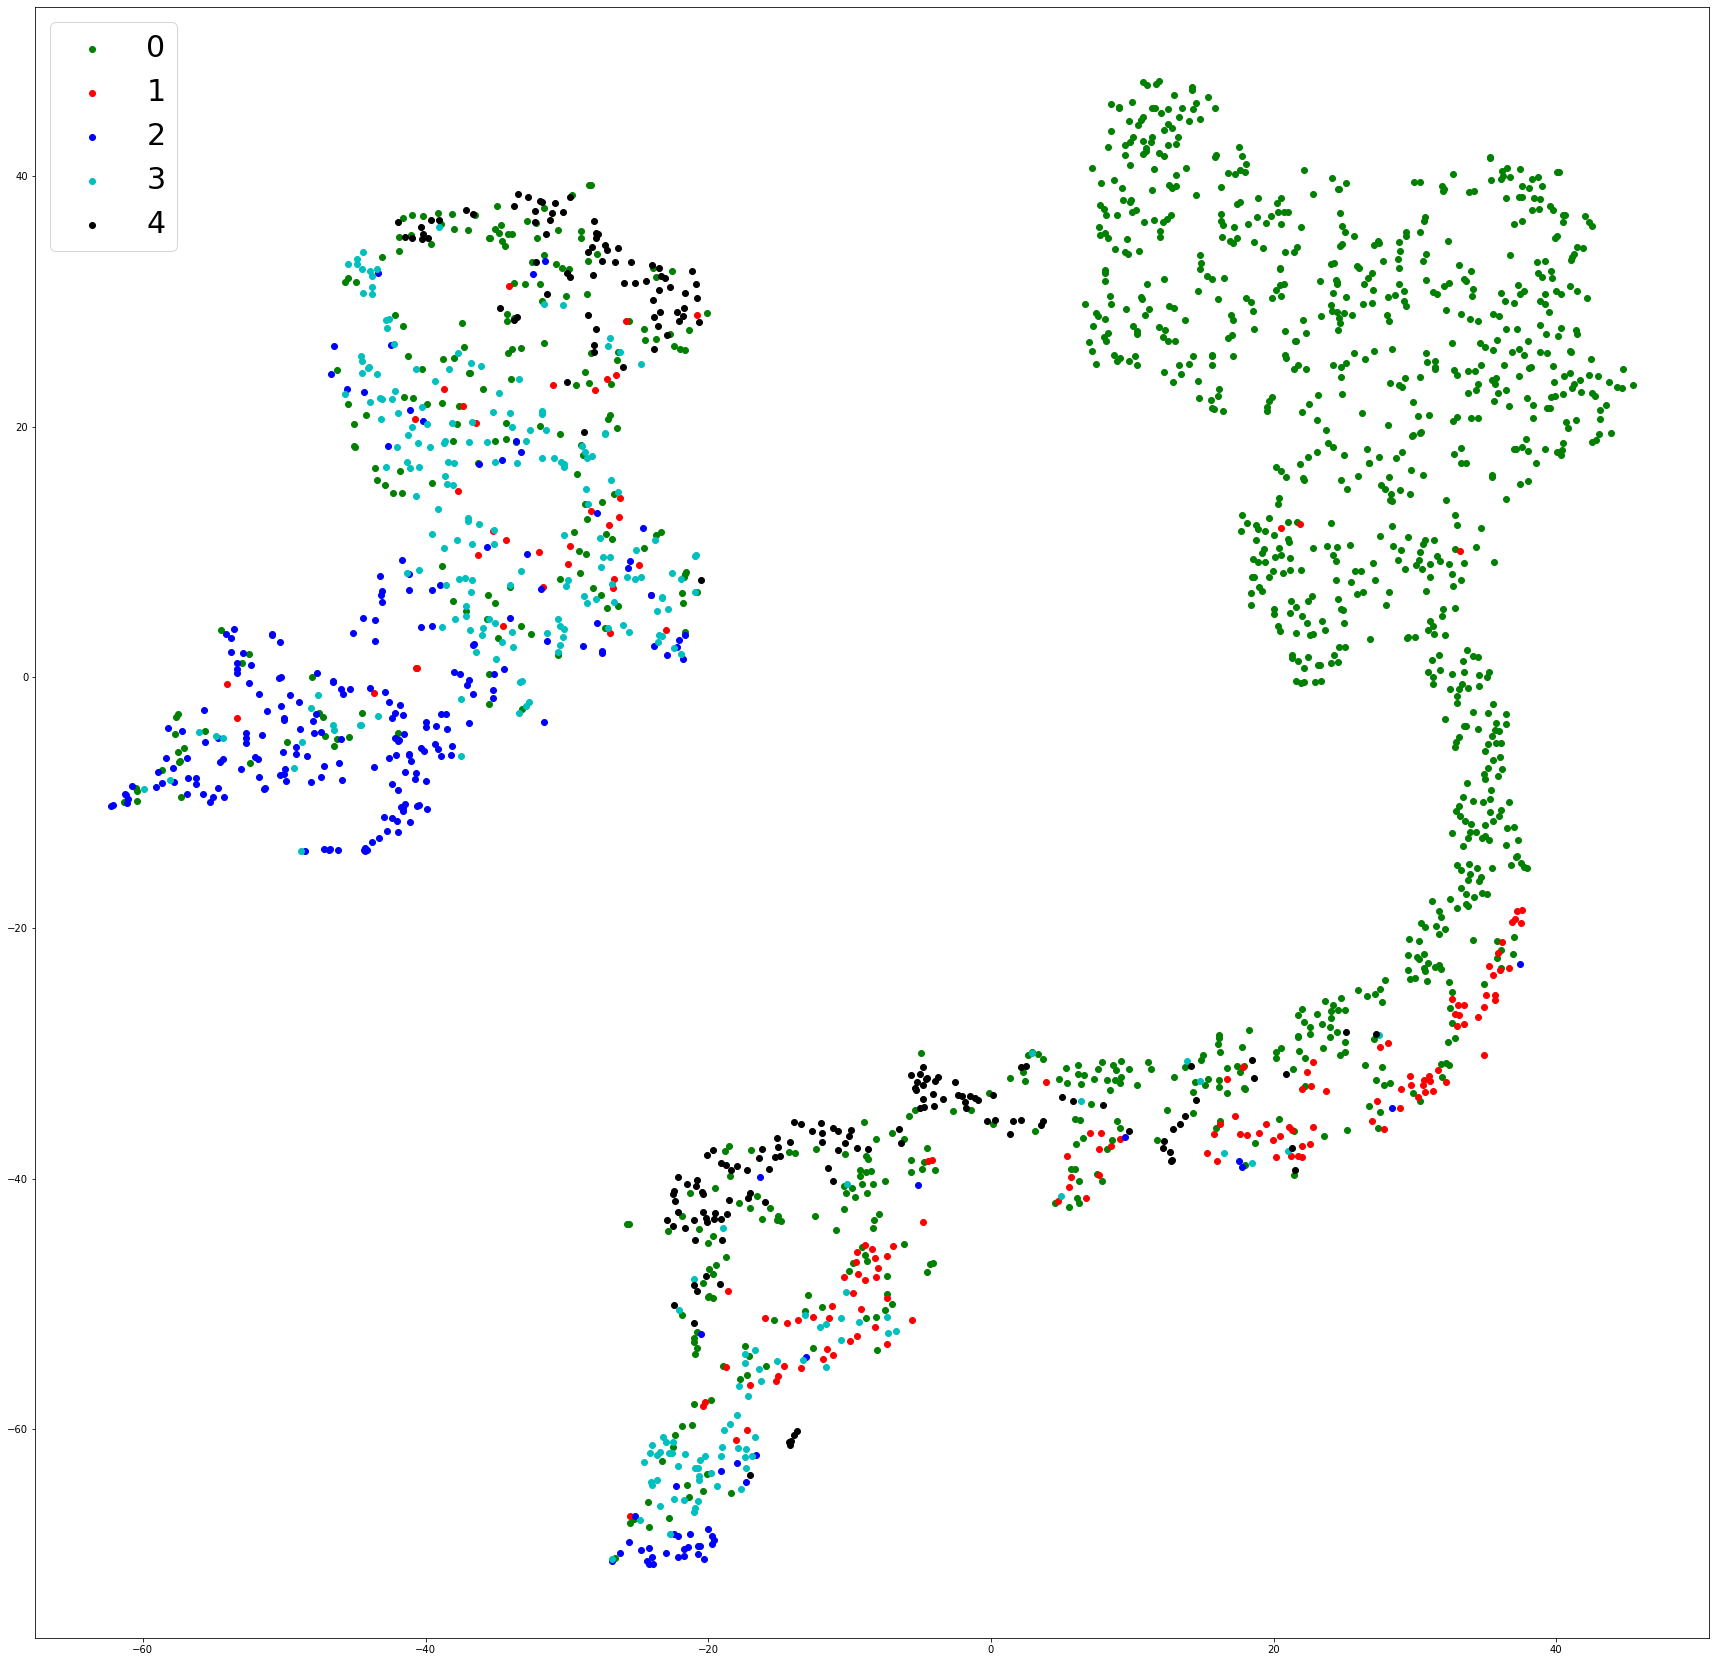

In [8]:
#filename = "/Users/y-nakamura/yugo_workspace/hand_scaling/data/clf_results/results_20210708/t-sne/force_acc_gyro.png"
df_feature= df_upper

sX = df_feature[df_feature.columns.values[:-1]].values
sY1 = df_feature.label.values

stsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
sX_embedded = stsne.fit_transform(sX)

df_tsne = pd.DataFrame(sX_embedded, columns = ['col1', 'col2'])

sddf = pd.concat([df_tsne, df_feature.label], axis = 1)

colors =  ["g", "r", "b", "c", "k"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(np.unique(sddf.label.values)):
    tmp_df = sddf[sddf.label== v]
    plt.scatter(tmp_df['col1'],  
                tmp_df ['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 30)

#plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
